Data Analysis and EDA using PySpark

In [1]:
pip install findspark

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pyspark


     ---------------------------------------- 0.0/317.3 MB ? eta -:--:--
     ---------------------------------------- 0.0/317.3 MB ? eta -:--:--
     -------------------------------------- 0.0/317.3 MB 217.9 kB/s eta 0:24:17
     -------------------------------------- 0.0/317.3 MB 217.9 kB/s eta 0:24:17
     -------------------------------------- 0.0/317.3 MB 196.9 kB/s eta 0:26:51
     -------------------------------------- 0.1/317.3 MB 272.3 kB/s eta 0:19:25
     -------------------------------------- 0.1/317.3 MB 280.5 kB/s eta 0:18:51
     -------------------------------------- 0.1/317.3 MB 291.5 kB/s eta 0:18:08
     -------------------------------------- 0.2/317.3 MB 456.4 kB/s eta 0:11:35
     -------------------------------------- 0.2/317.3 MB 491.5 kB/s eta 0:10:46
     -------------------------------------- 0.2/317.3 MB 491.0 kB/s eta 0:10:46
     -------------------------------------- 0.3/317.3 MB 593.9 kB/s eta 0:08:54
     -------------------------------------- 0.3/317.3

     --------------- -------------------- 135.5/317.3 MB 364.7 kB/s eta 0:08:19
     --------------- -------------------- 135.5/317.3 MB 364.7 kB/s eta 0:08:19
     --------------- -------------------- 135.5/317.3 MB 364.7 kB/s eta 0:08:19
     --------------- -------------------- 135.5/317.3 MB 361.3 kB/s eta 0:08:23
     --------------- -------------------- 135.5/317.3 MB 361.3 kB/s eta 0:08:23
     --------------- -------------------- 135.6/317.3 MB 360.3 kB/s eta 0:08:25
     --------------- -------------------- 135.6/317.3 MB 360.1 kB/s eta 0:08:25
     --------------- -------------------- 135.7/317.3 MB 360.1 kB/s eta 0:08:25
     --------------- -------------------- 135.7/317.3 MB 359.3 kB/s eta 0:08:26
     --------------- -------------------- 135.7/317.3 MB 359.3 kB/s eta 0:08:26
     --------------- -------------------- 135.7/317.3 MB 359.3 kB/s eta 0:08:26
     --------------- -------------------- 135.7/317.3 MB 359.3 kB/s eta 0:08:26
     --------------- -------------------

In [48]:
# It wil set spark environment variable
import findspark
findspark.init()

In [49]:
import os
import pyspark
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt

import pyspark.sql.types as ptypes
import pyspark.sql.functions as funcs

In [50]:
spark = pyspark.sql.SparkSession.builder.master('local[*]').appName('FOOD').getOrCreate()

Updating matpotlib configuration to change figure size

In [51]:
df_path=(r'C:\Users\Wondwossen\Desktop\FINAL FOOD DATASET\FOOD-DATA-GROUP1.csv')
df_data = spark.read.csv(df_path, inferSchema=True, header=True)

In [52]:
df_data.show(2)

+---+----------+-----------------+-------------+----+--------------+--------------------+--------------------+-------------+------+-------+-------------+-----------+------+-----+---------+----------+-----------+-----------+----------+----------+----------+----------+---------+---------+---------+---------+-------+------+-----+---------+---------+----------+---------+--------+-----+-----------------+
|_c0|Unnamed: 0|             food|Caloric Value| Fat|Saturated Fats|Monounsaturated Fats|Polyunsaturated Fats|Carbohydrates|Sugars|Protein|Dietary Fiber|Cholesterol|Sodium|Water|Vitamin A|Vitamin B1|Vitamin B11|Vitamin B12|Vitamin B2|Vitamin B3|Vitamin B5|Vitamin B6|Vitamin C|Vitamin D|Vitamin E|Vitamin K|Calcium|Copper| Iron|Magnesium|Manganese|Phosphorus|Potassium|Selenium| Zinc|Nutrition Density|
+---+----------+-----------------+-------------+----+--------------+--------------------+--------------------+-------------+------+-------+-------------+-----------+------+-----+---------+------

In [53]:
print('Data overview')
df_data.printSchema()
print('Columns overview')
pd.DataFrame(df_data.dtypes, columns = ['Column Name','Data type'])

Data overview
root
 |-- _c0: integer (nullable = true)
 |-- Unnamed: 0: integer (nullable = true)
 |-- food: string (nullable = true)
 |-- Caloric Value: integer (nullable = true)
 |-- Fat: double (nullable = true)
 |-- Saturated Fats: double (nullable = true)
 |-- Monounsaturated Fats: double (nullable = true)
 |-- Polyunsaturated Fats: double (nullable = true)
 |-- Carbohydrates: double (nullable = true)
 |-- Sugars: double (nullable = true)
 |-- Protein: double (nullable = true)
 |-- Dietary Fiber: double (nullable = true)
 |-- Cholesterol: double (nullable = true)
 |-- Sodium: double (nullable = true)
 |-- Water: double (nullable = true)
 |-- Vitamin A: double (nullable = true)
 |-- Vitamin B1: double (nullable = true)
 |-- Vitamin B11: double (nullable = true)
 |-- Vitamin B12: double (nullable = true)
 |-- Vitamin B2: double (nullable = true)
 |-- Vitamin B3: double (nullable = true)
 |-- Vitamin B5: double (nullable = true)
 |-- Vitamin B6: double (nullable = true)
 |-- Vitamin 

,Column Name,Data type
0,_c0,int
1,Unnamed: 0,int
2,food,string
3,Caloric Value,int
4,Fat,double
5,Saturated Fats,double
6,Monounsaturated Fats,double
7,Polyunsaturated Fats,double
8,Carbohydrates,double
9,Sugars,double


In [54]:
print('Data frame describe (string and numeric columns only):')
df_data.describe().toPandas()

print(f'There are total {df_data.count()} row, Let print first 2 data rows:')
df_data.limit(2).toPandas()

Data frame describe (string and numeric columns only):
There are total 551 row, Let print first 2 data rows:


,_c0,Unnamed: 0,food,Caloric Value,Fat,Saturated Fats,Monounsaturated Fats,Polyunsaturated Fats,Carbohydrates,Sugars,...,Calcium,Copper,Iron,Magnesium,Manganese,Phosphorus,Potassium,Selenium,Zinc,Nutrition Density
0,0,0,cream cheese,51,5.0,2.9,1.3,0.2,0.8,0.5,...,0.008,14.100,0.082,0.027,1.300,0.091,15.5,19.100,0.039,7.07
1,1,1,neufchatel cheese,215,19.4,10.9,4.9,0.8,3.1,2.7,...,99.500,0.034,0.100,8.500,0.088,117.300,129.2,0.054,0.700,130.10


Dropping Unnamed column

In [55]:
df_data_dropped = df_data.drop('_c0'and'Unnamed:0')

Cleaning _c0 and Unnamed:0 column

In [56]:
df_data_dropped.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- Unnamed: 0: integer (nullable = true)
 |-- food: string (nullable = true)
 |-- Caloric Value: integer (nullable = true)
 |-- Fat: double (nullable = true)
 |-- Saturated Fats: double (nullable = true)
 |-- Monounsaturated Fats: double (nullable = true)
 |-- Polyunsaturated Fats: double (nullable = true)
 |-- Carbohydrates: double (nullable = true)
 |-- Sugars: double (nullable = true)
 |-- Protein: double (nullable = true)
 |-- Dietary Fiber: double (nullable = true)
 |-- Cholesterol: double (nullable = true)
 |-- Sodium: double (nullable = true)
 |-- Water: double (nullable = true)
 |-- Vitamin A: double (nullable = true)
 |-- Vitamin B1: double (nullable = true)
 |-- Vitamin B11: double (nullable = true)
 |-- Vitamin B12: double (nullable = true)
 |-- Vitamin B2: double (nullable = true)
 |-- Vitamin B3: double (nullable = true)
 |-- Vitamin B5: double (nullable = true)
 |-- Vitamin B6: double (nullable = true)
 |-- Vitamin C: double (nul

In [57]:
%matplotlib inline
%config InlineBackend.rc = {'figure.figsize': (18, 10)}
import seaborn as sns 

In [58]:
histogram_data = df_data_dropped.groupBy("Caloric Value").count().orderBy("Caloric Value")  
pdf = histogram_data.toPandas()  

Histogram of Caloric Value

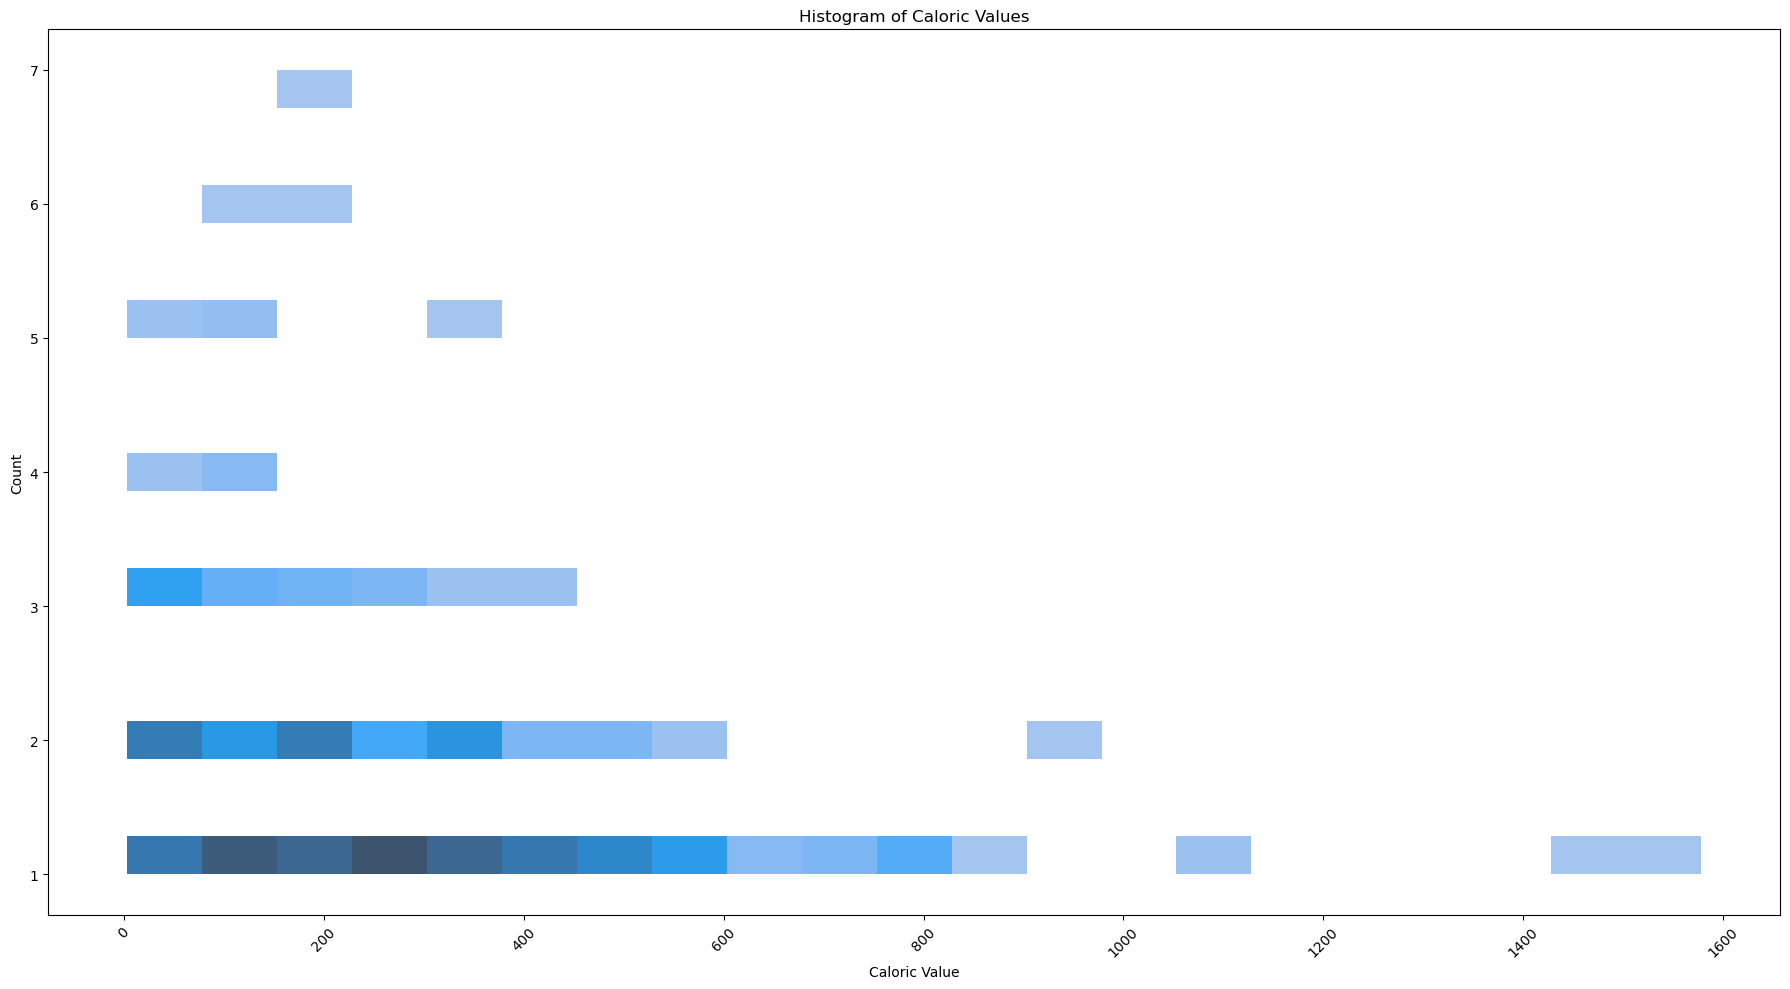

In [59]:
# Plotting the histogram  
plt.figure(figsize=(18, 10))  
sns.histplot(x='Caloric Value', y='count', data=pdf)  
plt.title('Histogram of Caloric Values')  
plt.xlabel('Caloric Value')  
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed  
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels  
plt.show()  

In [60]:
histogram_data = df_data_dropped.groupBy("Fat").count().orderBy("Fat")  
pdf = histogram_data.toPandas() 

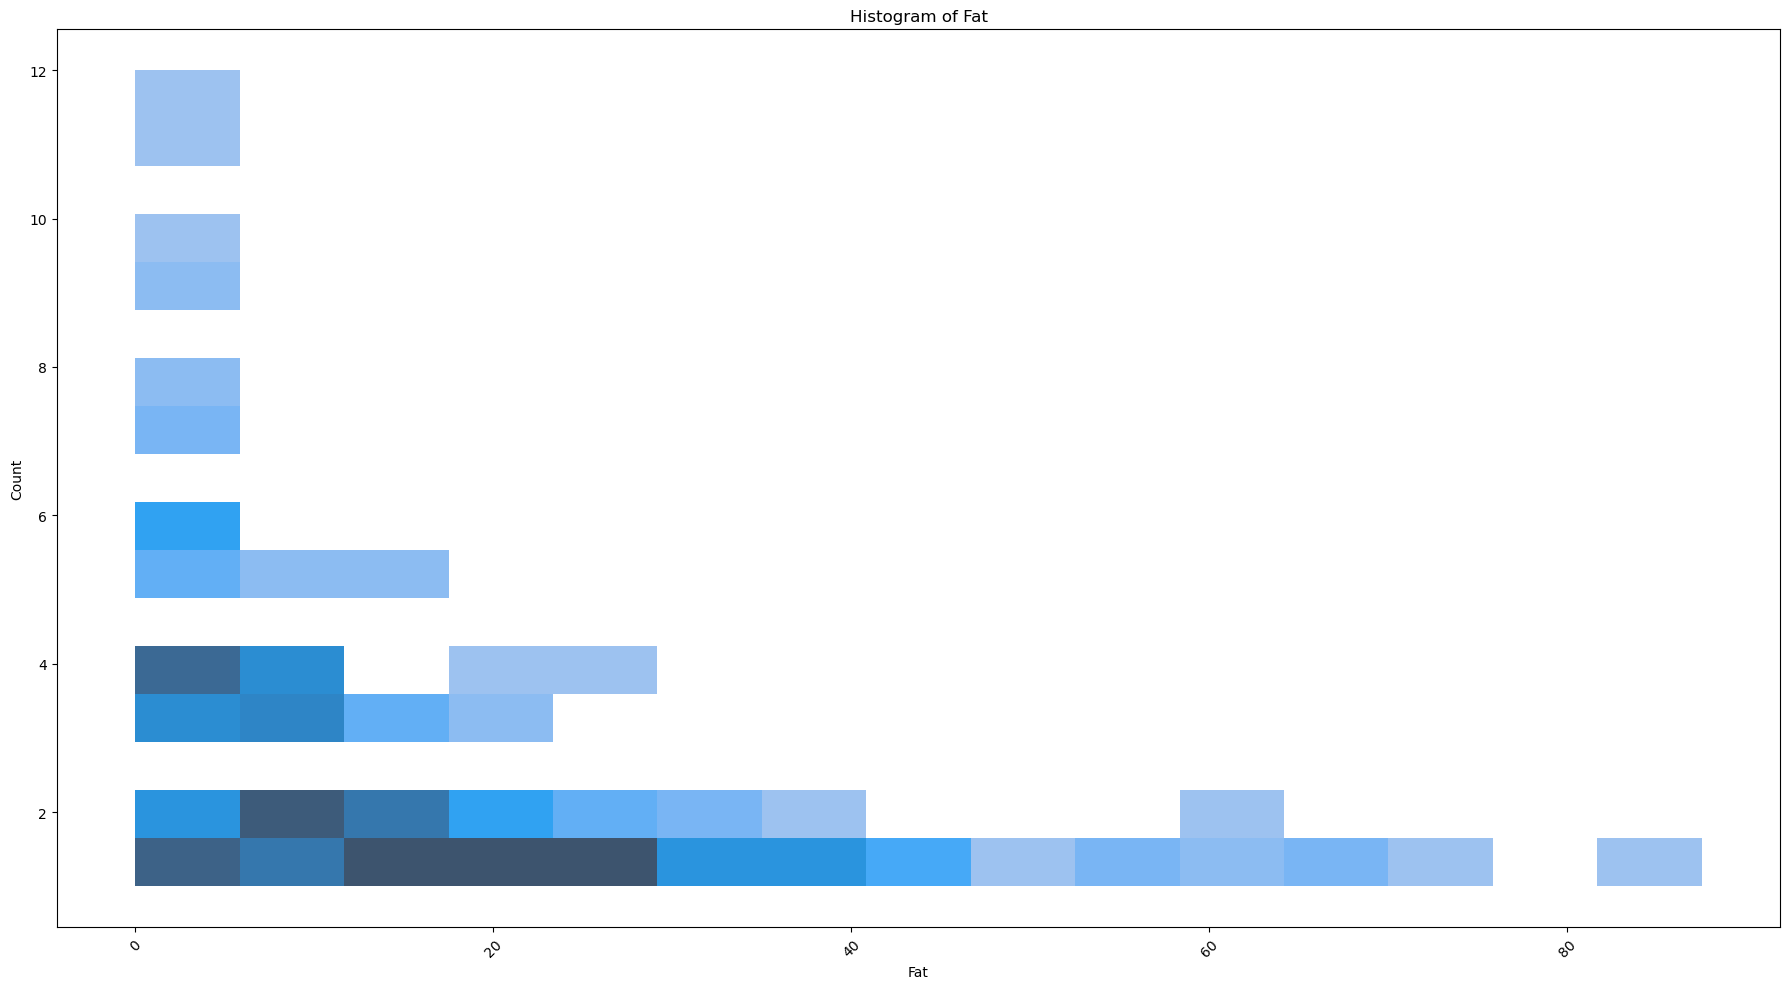

In [61]:
# Plotting the histogram  
plt.figure(figsize=(18, 10))  
sns.histplot(x='Fat', y='count', data=pdf)  
plt.title('Histogram of Fat')  
plt.xlabel('Fat')  
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed  
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels  
plt.show()  

In [62]:
histogram_data = df_data_dropped.groupBy("Carbohydrates").count().orderBy("Carbohydrates")  
pdf = histogram_data.toPandas() 

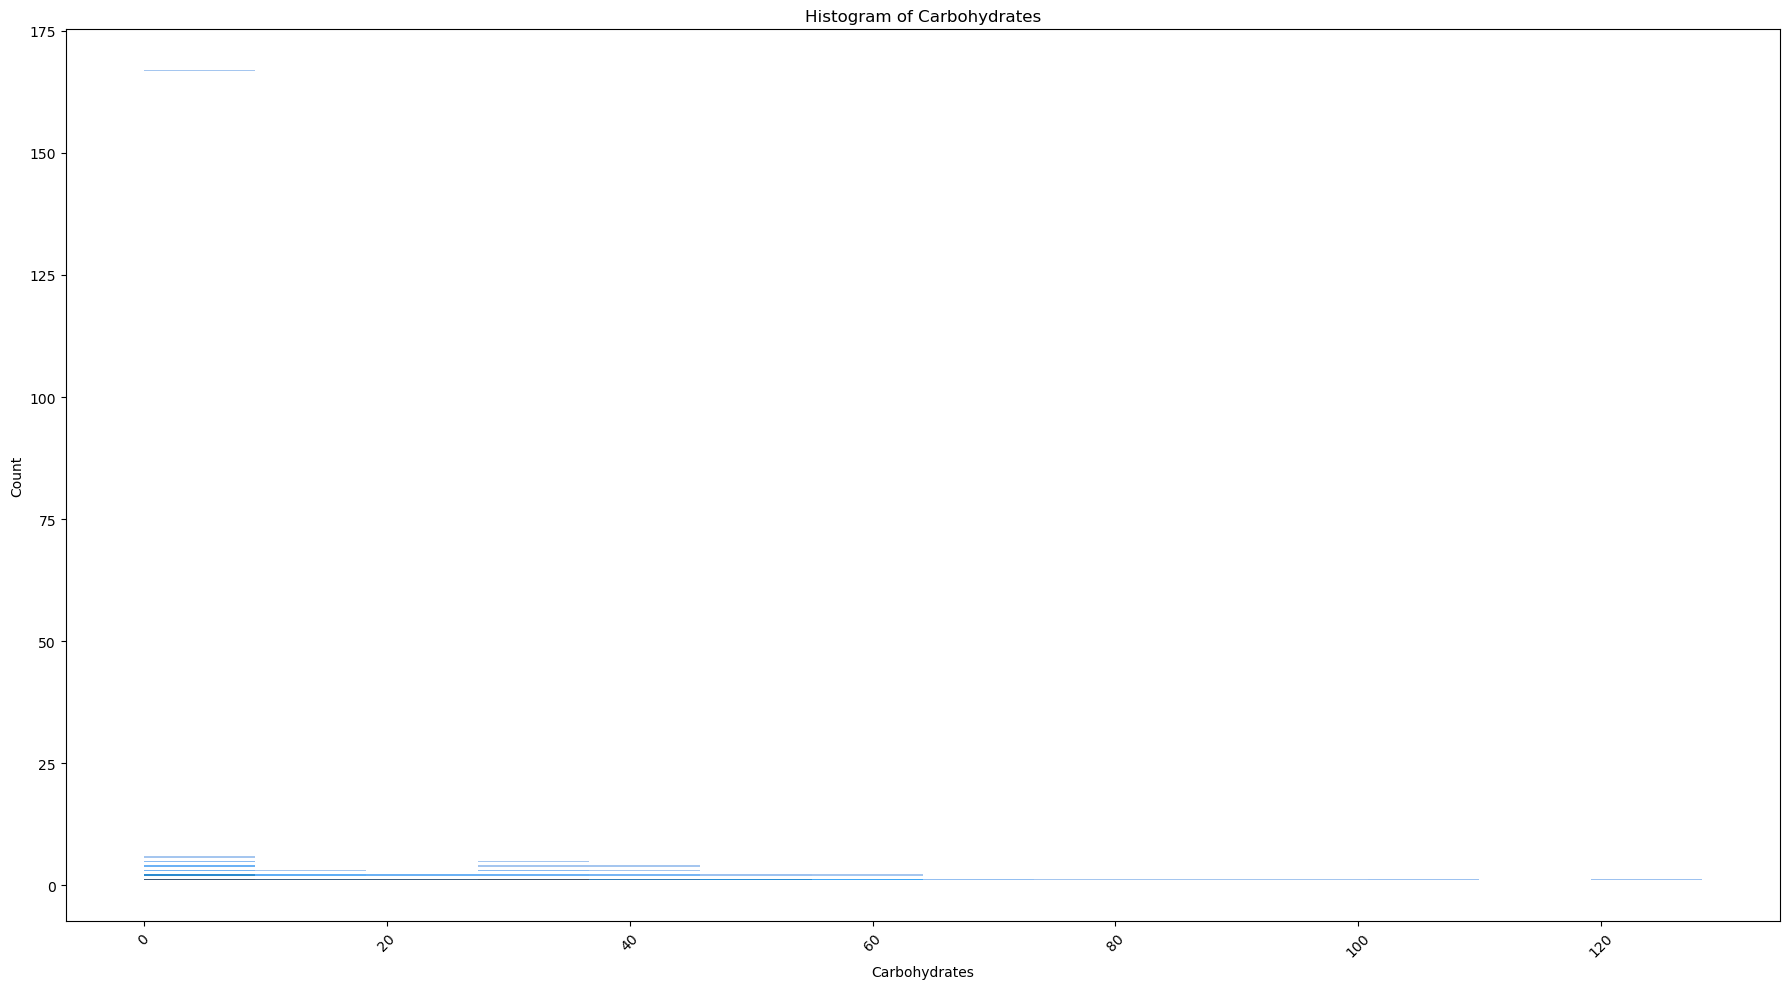

In [63]:
# Plotting the histogram  
plt.figure(figsize=(18, 10))  
sns.histplot(x='Carbohydrates', y='count', data=pdf)  
plt.title('Histogram of Carbohydrates')  
plt.xlabel('Carbohydrates')  
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed  
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels  
plt.show()  

In [64]:
histogram_data = df_data_dropped.groupBy("Protein").count().orderBy("Protein")  
pdf = histogram_data.toPandas() 

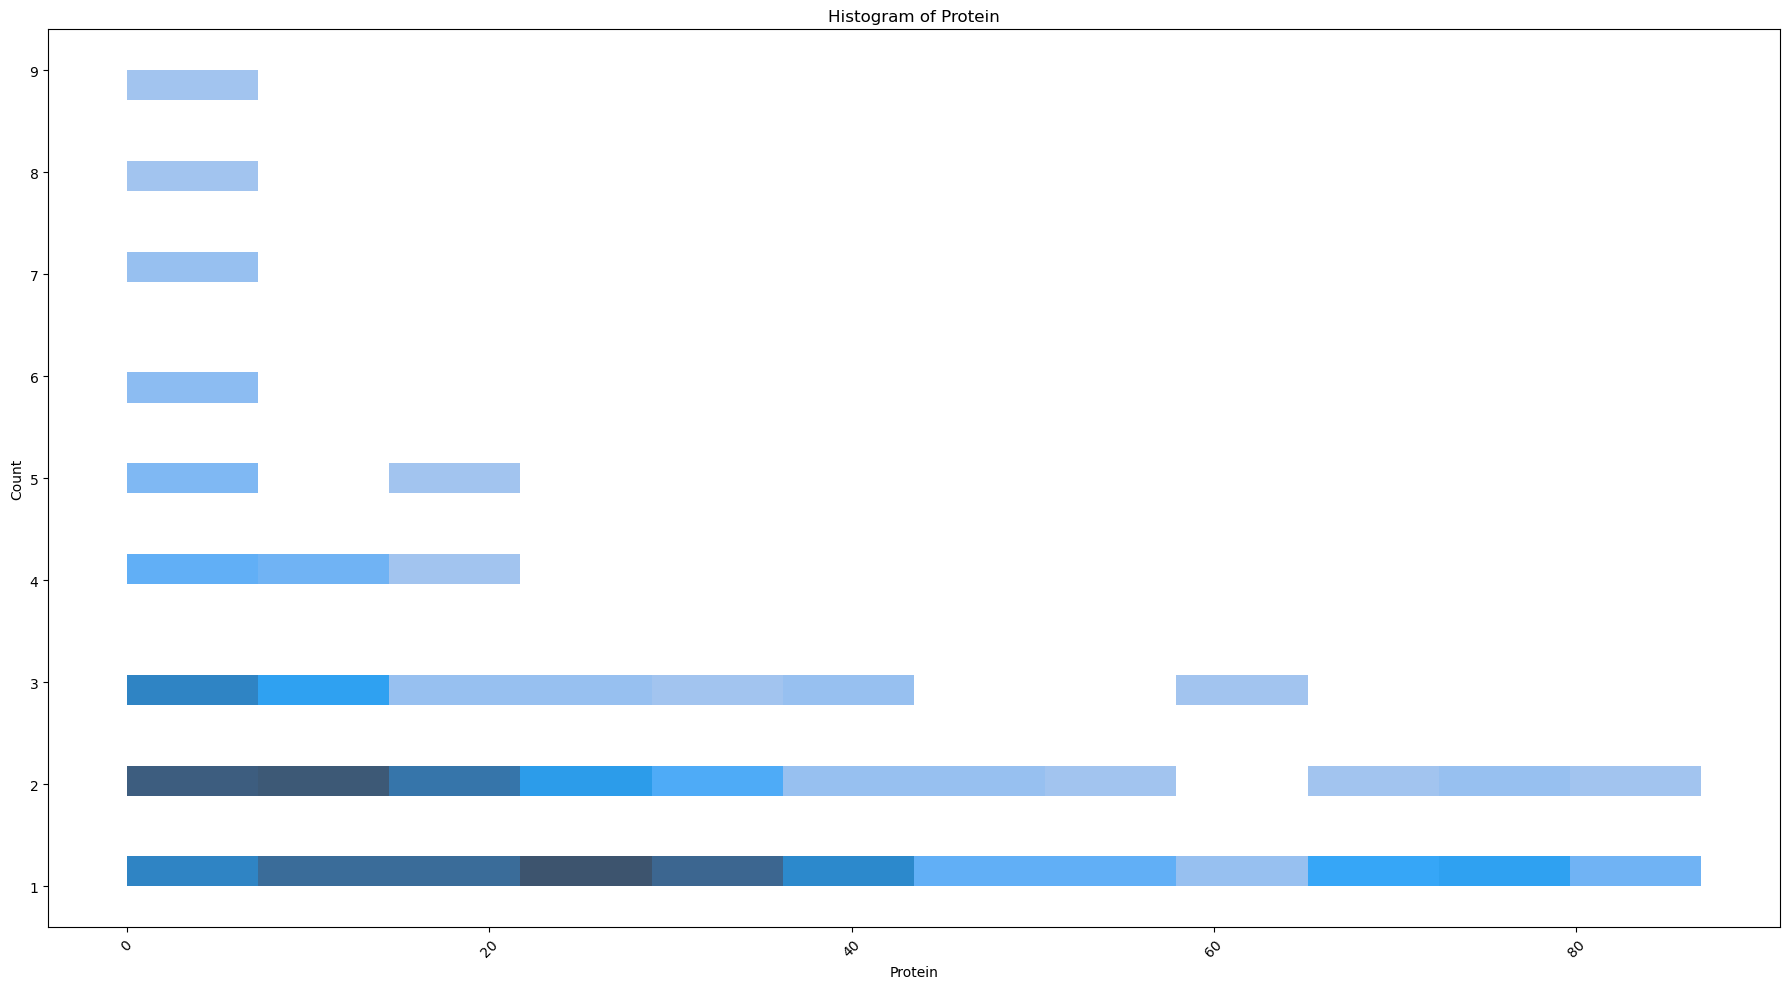

In [65]:
# Plotting the histogram  
plt.figure(figsize=(18, 10))  
sns.histplot(x='Protein', y='count', data=pdf)  
plt.title('Histogram of Protein')  
plt.xlabel('Protein')  
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed  
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels  
plt.show()  

In [66]:
histogram_data = df_data_dropped.groupBy("Dietary Fiber").count().orderBy("Dietary Fiber")  
pdf = histogram_data.toPandas() 

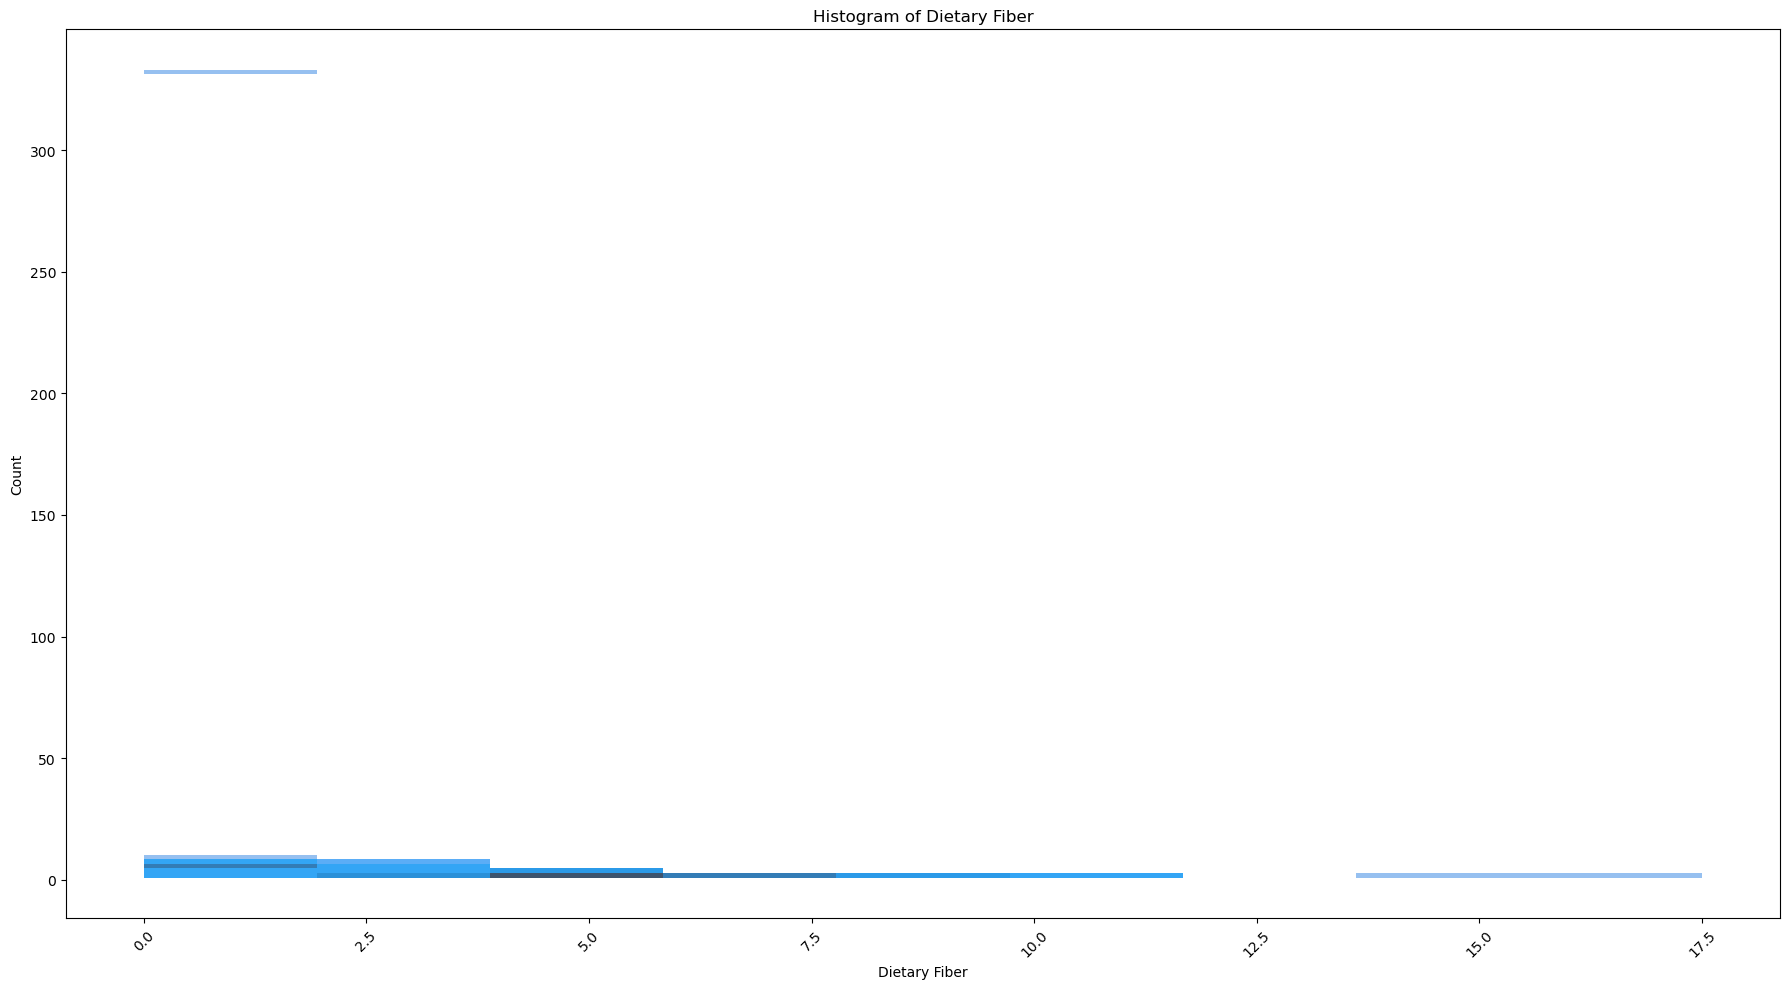

In [67]:
# Plotting the histogram  
plt.figure(figsize=(18, 10))  
sns.histplot(x='Dietary Fiber', y='count', data=pdf)  
plt.title('Histogram of Dietary Fiber')  
plt.xlabel('Dietary Fiber')  
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed  
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels  
plt.show()  

In [77]:
# descriptive statistics of Nutrition Density,Caloric value,protin, fat, carbohydrate and Dietary fiber
numeric_stats=df_data_dropped.describe('Nutrition Density', 'Caloric Value', 'Fat', 'Protein', 'Carbohydrates', 'Dietary Fiber')
numeric_stats.show()

+-------+------------------+------------------+------------------+------------------+------------------+-----------------+
|summary| Nutrition Density|     Caloric Value|               Fat|           Protein|     Carbohydrates|    Dietary Fiber|
+-------+------------------+------------------+------------------+------------------+------------------+-----------------+
|  count|               551|               551|               551|               551|               551|              551|
|   mean|144.66320689655174|237.35934664246824|10.766932849364785|18.417856624319416|15.819036297640665|1.098145190562614|
| stddev| 187.0476228328469|199.23559762874058| 12.54419645258066|18.932403570678556| 20.28931962151848|2.156680591845952|
|    min|             1.025|                 3|               0.0|               0.0|               0.0|              0.0|
|    max|            1337.0|              1578|              87.5|              86.9|             128.3|             17.5|
+-------+-------

In [71]:
# checking missing value count for each variable
from pyspark.sql.functions import col, isnan, when, count
missing_values = df_data_dropped.select(  
    [count(when(col(c).isNull() | isnan(c), c)).alias(c) for c in df_data_dropped.columns]  
)  

missing_values.show()  

+---+----------+----+-------------+---+--------------+--------------------+--------------------+-------------+------+-------+-------------+-----------+------+-----+---------+----------+-----------+-----------+----------+----------+----------+----------+---------+---------+---------+---------+-------+------+----+---------+---------+----------+---------+--------+----+-----------------+
|_c0|Unnamed: 0|food|Caloric Value|Fat|Saturated Fats|Monounsaturated Fats|Polyunsaturated Fats|Carbohydrates|Sugars|Protein|Dietary Fiber|Cholesterol|Sodium|Water|Vitamin A|Vitamin B1|Vitamin B11|Vitamin B12|Vitamin B2|Vitamin B3|Vitamin B5|Vitamin B6|Vitamin C|Vitamin D|Vitamin E|Vitamin K|Calcium|Copper|Iron|Magnesium|Manganese|Phosphorus|Potassium|Selenium|Zinc|Nutrition Density|
+---+----------+----+-------------+---+--------------+--------------------+--------------------+-------------+------+-------+-------------+-----------+------+-----+---------+----------+-----------+-----------+----------+------

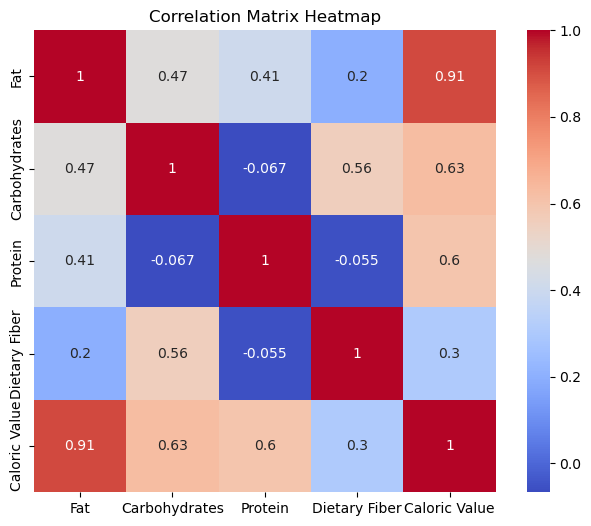

In [72]:
# what are the relations between the different factors in our data with each other
from pyspark.sql import SparkSession  
from pyspark.ml.feature import VectorAssembler  
from pyspark.ml.stat import Correlation  
import pandas as pd  
import seaborn as sns  
import matplotlib.pyplot as plt  

# Initialize Spark session  
spark = SparkSession.builder \
    .appName("Correlation Matrix") \
    .getOrCreate()  

# Select features 
selected_features = df_data_dropped.select("Fat", "Carbohydrates", "Protein", "Dietary Fiber", "Caloric Value")  
# Create vector column 
vector_assembler = VectorAssembler(inputCols=["Fat", "Carbohydrates", "Protein", "Dietary Fiber", "Caloric Value"], outputCol="features")  
vector_df_data_dropped = vector_assembler.transform(selected_features)  

# Calculate the correlation matrix  
correlation_matrix = Correlation.corr(vector_df_data_dropped, 'features').head()[0].toArray()   

# Convert the correlation matrix to a Pandas DataFrame for visualization  
correlation_matrix_df = pd.DataFrame(correlation_matrix, columns=["Fat", "Carbohydrates", "Protein", "Dietary Fiber", "Caloric Value"],  
                                     index=["Fat", "Carbohydrates", "Protein", "Dietary Fiber", "Caloric Value"])  

# Plotting the heatmap  
plt.figure(figsize=(8, 6))  
sns.heatmap(correlation_matrix_df, annot=True, cmap='coolwarm', square=True)  
plt.title("Correlation Matrix Heatmap")  
plt.show()  


In [75]:
from pyspark.sql import SparkSession  
from pyspark.ml.feature import VectorAssembler  
from pyspark.ml.regression import LinearRegression  
from pyspark.ml.evaluation import RegressionEvaluator  

# Initialize Spark session  
spark = SparkSession.builder \
    .appName("Nutrition Density Prediction") \
    .getOrCreate()  

# Assuming df_data is defined and loaded correctly. Uncomment if needed  
# df_data = spark.read.csv("your_file.csv", header=True, inferSchema=True)  

# Drop rows with missing values if needed  
df_data_dropped = df_data.dropna()  

# Define feature and label columns  
feature_columns = [  
    "Fat", "Carbohydrates", "Protein", "Dietary Fiber", "Caloric Value",   
    "Sugars", "Water", "Vitamin A", "Vitamin B1", "Vitamin B11",   
    "Vitamin B12", "Vitamin B2", "Vitamin B3", "Vitamin B5",   
    "Vitamin B6", "Vitamin C", "Vitamin D", "Vitamin E",   
    "Vitamin K", "Calcium", "Copper", "Iron", "Magnesium",   
    "Manganese", "Phosphorus", "Potassium", "Selenium", "Zinc"  
]  

# Ensure the feature columns are present in the DataFrame  
for feature in feature_columns:  
    if feature not in df_data_dropped.columns:  
        print(f"Warning: Feature '{feature}' not found in DataFrame columns.")  

# Assemble features into a single vector  
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")  
df_data_dropped = assembler.transform(df_data_dropped)  

# Select relevant columns for modeling  
final_data = df_data_dropped.select("Nutrition Density", "features")  

# Split the data into training and test sets (80% training, 20% testing)  
train_data, test_data = final_data.randomSplit([0.8, 0.2])  

# Create a Linear Regression model  
lr = LinearRegression(labelCol="Nutrition Density", featuresCol="features")  

# Fit the model  
lr_model = lr.fit(train_data)  

# Display the coefficients and intercept  
print(f"Coefficients: {lr_model.coefficients}")  
print(f"Intercept: {lr_model.intercept}")  

# Make predictions on test data  
predictions = lr_model.transform(test_data)  

# Show predictions alongside actual values  
predictions.select("features", "Nutrition Density", "prediction").show(10)  

# Evaluate the model  
evaluator = RegressionEvaluator(labelCol="Nutrition Density", predictionCol="prediction", metricName="rmse")  
rmse = evaluator.evaluate(predictions)  

print(f"Root Mean Squared Error (RMSE): {rmse}")  



Coefficients: [1.0004310427135499,0.9999619002800538,0.9998109800764015,1.0002795330365246,-2.3581805190770382e-05,-1.1576857040900024e-05,1.3170824308658728e-05,0.9716326834904503,0.0013767263448100195,-0.08681473427131385,0.06226238502333073,0.005757830097920907,0.0005040999119353528,0.002745788276107212,-0.008034360075397911,1.0000247081303448,0.004271756839918179,0.0003071221657866026,-0.0004469393600795251,0.999997493482907,6.027745886446111e-05,0.9985635783775104,1.295527011493983e-05,0.0005905614260429223,4.938530270216028e-06,3.4416544852678835e-06,-6.276593272894593e-05,0.00018411953733413523]
Intercept: 0.0019648617597693607
+--------------------+-----------------+------------------+
|            features|Nutrition Density|        prediction|
+--------------------+-----------------+------------------+
|[0.048,0.0,0.6,0....|            1.788| 1.872468461836493|
|[0.3,0.6,0.6,0.0,...|            3.739|3.7264673769038614|
|[0.8,0.0,3.2,0.0,...|            6.517|  6.5204382627542